In [367]:
import pandas as pd 
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
sb.set()
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [368]:
data= pd.read_csv('/content/master.csv')
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [369]:
data =data.drop(['HDI for year', 'country-year'],axis=1)

In [370]:
data.isna().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
dtype: int64

In [371]:
data.shape

(27820, 10)

In [372]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7    gdp_for_year ($)   27820 non-null  object 
 8   gdp_per_capita ($)  27820 non-null  int64  
 9   generation          27820 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 2.1+ MB


In [373]:
# Calculate the complete correlation matrix
data.corr().round(2)

,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
year,1.00,-0.00,0.01,-0.04,0.34
suicides_no,-0.00,1.00,0.62,0.31,0.06
population,0.01,0.62,1.00,0.01,0.08
suicides/100k pop,-0.04,0.31,0.01,1.00,0.00
gdp_per_capita ($),0.34,0.06,0.08,0.00,1.00


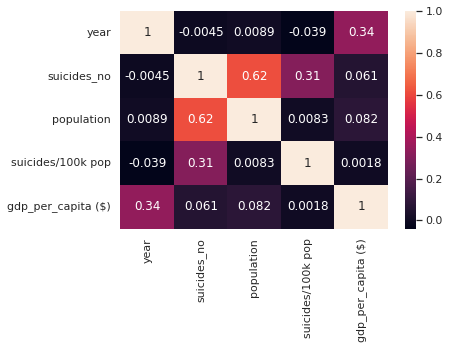

In [374]:
sns.heatmap(data.corr(), annot=True);

In [375]:
data.groupby(['generation','sex']).size()

generation       sex   
Boomers          female    2495
                 male      2495
G.I. Generation  female    1372
                 male      1372
Generation X     female    3204
                 male      3204
Generation Z     female     735
                 male       735
Millenials       female    2922
                 male      2922
Silent           female    3182
                 male      3182
dtype: int64

In [376]:
from sklearn import preprocessing

le=preprocessing.LabelEncoder()
le.fit(data['age'])
data['age'] = le.transform(data['age'])


In [377]:
le.fit(data['sex'])
data['sex'] = le.transform(data['sex'])

In [378]:
le.fit(data['generation'])
data['generation'] = le.transform(data['generation'])

In [379]:
le.fit(data['country'])
data['country'] = le.fit_transform(data.country	)

In [380]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,0,1987,1,0,21,312900,6.71,"2,156,624,900",796,2
1,0,1987,1,2,16,308000,5.19,"2,156,624,900",796,5
2,0,1987,0,0,14,289700,4.83,"2,156,624,900",796,2
3,0,1987,1,5,1,21800,4.59,"2,156,624,900",796,1
4,0,1987,1,1,9,274300,3.28,"2,156,624,900",796,0


In [381]:
data.replace(',','',inplace=True,regex=True)

In [382]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,0,1987,1,0,21,312900,6.71,2156624900,796,2
1,0,1987,1,2,16,308000,5.19,2156624900,796,5
2,0,1987,0,0,14,289700,4.83,2156624900,796,2
3,0,1987,1,5,1,21800,4.59,2156624900,796,1
4,0,1987,1,1,9,274300,3.28,2156624900,796,0


In [383]:
data[' gdp_for_year ($) '] = data[' gdp_for_year ($) '].astype(str)

In [384]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  int64  
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  int64  
 3   age                 27820 non-null  int64  
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7    gdp_for_year ($)   27820 non-null  object 
 8   gdp_per_capita ($)  27820 non-null  int64  
 9   generation          27820 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 2.1+ MB


In [385]:
data[' gdp_for_year ($) '] = data[' gdp_for_year ($) '].astype(int)

In [386]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  int64  
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  int64  
 3   age                 27820 non-null  int64  
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7    gdp_for_year ($)   27820 non-null  int64  
 8   gdp_per_capita ($)  27820 non-null  int64  
 9   generation          27820 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 2.1 MB


In [387]:
X =data.drop(['suicides_no'],axis=1)
y =data[['suicides_no']]

In [388]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(22256, 9) (22256, 1)
(5564, 9) (5564, 1)


In [389]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22256 entries, 10527 to 17673
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             22256 non-null  int64  
 1   year                22256 non-null  int64  
 2   sex                 22256 non-null  int64  
 3   age                 22256 non-null  int64  
 4   population          22256 non-null  int64  
 5   suicides/100k pop   22256 non-null  float64
 6    gdp_for_year ($)   22256 non-null  int64  
 7   gdp_per_capita ($)  22256 non-null  int64  
 8   generation          22256 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 1.7 MB


In [393]:

linreg = LinearRegression()
linreg.fit(X_train, y_train)
print("Training set R^2:", linreg.score(X_train, y_train))
print("Test set R^2:", linreg.score(X_test, y_test))
print("Accuracy on training Data: ",linreg.score(X_train, y_train))
print("Accuracy on test Data: ",linreg.score(X_test,y_test))


Training set R^2: 0.4755114938664392
Test set R^2: 0.4614270427061663
Accuracy on training Data:  0.4755114938664392
Accuracy on test Data:  0.4614270427061663


The accurac is just 0.46. Therefore, the performance of this model is not very great. 

In [394]:
###Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

# instantiate the model 
tree = DecisionTreeRegressor(max_depth=9)
# fit the model 
tree.fit(X_train, y_train)
print("Training set R^2:", tree.score(X_train, y_train))
print("Test set R^2:", tree.score(X_test, y_test))
print("Accuracy on test Data: ",tree.score(X_test,y_test))
print("Accuracy on training Data: ",tree.score(X_train, y_train))

#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)


Training set R^2: 0.9986083648854747
Test set R^2: 0.9897027516215994
Accuracy on test Data:  0.9897027516215994
Accuracy on training Data:  0.9986083648854747


conclution:

the accuacy for trainning Data is 0.99 and 0.98 for test Data. This is definitly more accurate than the Linear Regression